In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Reading the file using Pandas
df = pd.read_csv("musk_csv.csv")
df.head(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


So, We can see that first three columns are little to no use for our task, and should eventually be dropped before training

Some more data analysis using some pre-built functions

In [3]:
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


Extracting the Independent and Dependent variables form our Dataframe

In [5]:
# creating input features and target variables
X= df.iloc[:,3:169]
y= df.iloc[:,169]

There is lot of variation in those 16 different columns strating from f1 all the way f166,

So these values should be standardized, and we do this by using Sklearn in built Standard Scaler

In [6]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
# Splitting the data into training and validation set in the ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Architecture of Model

In [8]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=166))
#Second  Hidden Layer
classifier.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [9]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [10]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                10688     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 44,481
Trainable params: 44,481
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, batch_size=32,
                        epochs=10, validation_data=(X_test, y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 2s 333us/step - loss: 0.1952 - accuracy: 0.9200 - val_loss: 0.1283 - val_accuracy: 0.9553
Epoch 2/10
5278/5278 [==============================] - 1s 168us/step - loss: 0.0861 - accuracy: 0.9695 - val_loss: 0.0851 - val_accuracy: 0.9712
Epoch 3/10
5278/5278 [==============================] - 1s 117us/step - loss: 0.0569 - accuracy: 0.9780 - val_loss: 0.0548 - val_accuracy: 0.9811
Epoch 4/10
5278/5278 [==============================] - 0s 64us/step - loss: 0.0325 - accuracy: 0.9869 - val_loss: 0.0526 - val_accuracy: 0.9788
Epoch 5/10
5278/5278 [==============================] - 1s 105us/step - loss: 0.0242 - accuracy: 0.9896 - val_loss: 0.0520 - val_accuracy: 0.9780
Epoch 6/10
5278/5278 [==============================] - 0s 83us/step - loss: 0.0353 - accuracy: 0.9869 - val_loss: 0.0497 - val_accuracy: 0.9811
Epoch 7/10
5278/5278 [==============================] - 0s 72us/step - loss: 0

It is very good for a model with this simple architecture.

A high validation accuracy indicates that our model has generalized pretty well

In [12]:
eval_model=classifier.evaluate(X_train, y_train)
# Loss and Accuracy of Model
eval_model

5278/5278 [==============================] - 0s 33us/step


[0.019707267387290516, 0.9928002953529358]

Loss : 1% thats reasonable, Accuracy:99% Thats awesome

Now, its time to predict values and convert them in the form of 0's and 1's as right now they will be in the form of probabilities

In [16]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1086   10]
 [   8  216]]


In [18]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


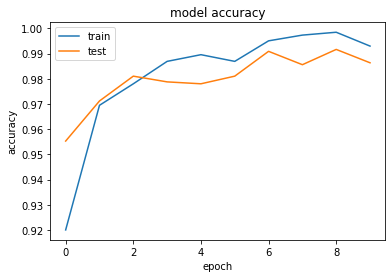

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

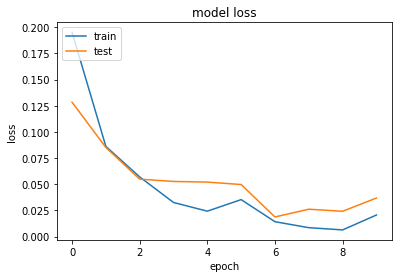

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1096
           1       0.96      0.96      0.96       224

    accuracy                           0.99      1320
   macro avg       0.97      0.98      0.98      1320
weighted avg       0.99      0.99      0.99      1320

